In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
from matplotlib import cm

# Q3

## 3.3

In [3]:
df = pd.read_csv('./problem3.csv', header=None, names = ['data'])

In [4]:
df['data']

0      1.552381
1      1.235375
2      2.135027
3      1.494399
4      1.736105
         ...   
995    2.228320
996    1.258792
997    1.501839
998    1.394394
999    2.606016
Name: data, Length: 1000, dtype: float64

In [5]:
def neg_loglikelihood(theta, data):
    n = data.shape[0]
    x0, gamma = theta
    
    logmle = -n*np.log(np.pi)-n*gamma
    logmle = logmle - sum(np.log(((data-x0)/np.exp(gamma))**2 + 1))
    
    return - logmle

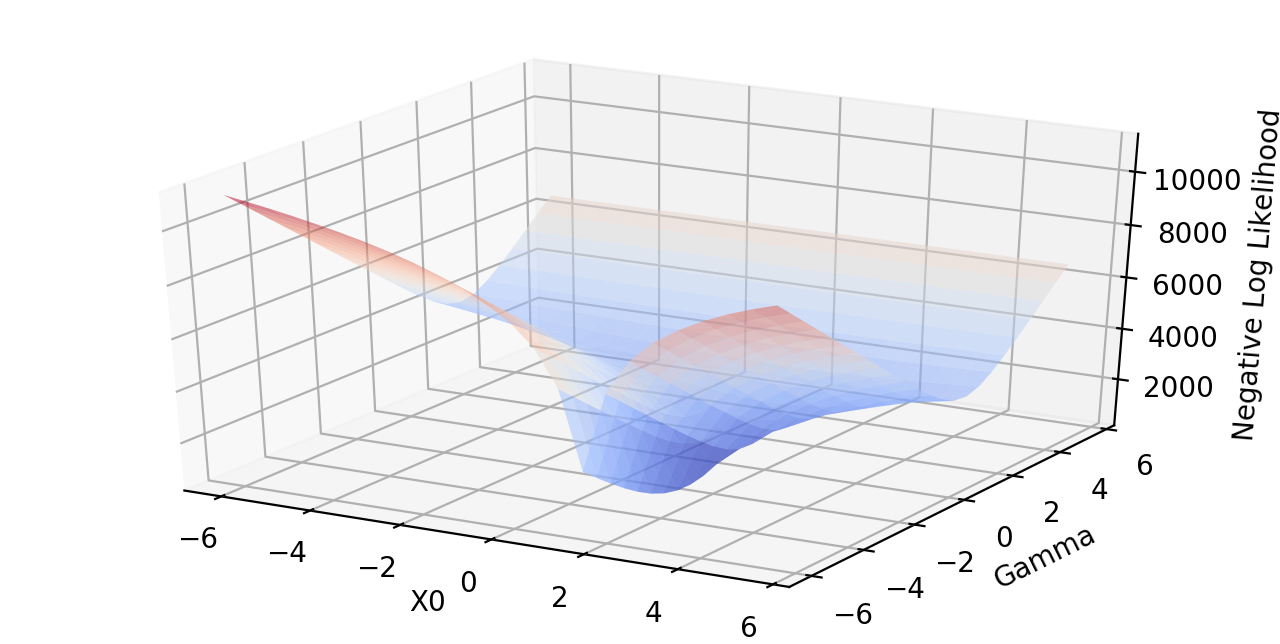

In [6]:
# Plot
fig = plt.figure(figsize=(8,4), dpi=200)
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-6, 6, 0.5)
y = np.arange(-6, 6, 0.5)
X, Y = np.meshgrid(x, y)

def fun(x, y, data):
    return np.array([neg_loglikelihood((x_value, y_value), data) for x_value, y_value in zip(x,y) ])

zs = np.array(fun(np.ravel(X), np.ravel(Y), df['data']))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)

ax.set_xlabel('X0')
ax.set_ylabel('Gamma')
ax.set_zlabel('Negative Log Likelihood')
 
# Set rotation angle to 30 degrees
#ax.view_init(azim=30)
plt.show()

## 3.4

In [7]:
def neg_loglikelihood2(theta, data):
    n = data.shape[0]
    x0, gamma = theta
    
    logmle = -n*np.log(np.pi)-n*gamma
    logmle = logmle - sum(np.log(((data-x0)/np.exp(gamma))**2 + 1))
    
    global x0_log
    global gamma_log
    x0_log.append(x0)
    gamma_log.append(gamma)
    
    return - logmle
# Negative log likelihood function gradient (consists of partial derivatives).
# The first component is the partial with respect to mu.
# The second component is the partial with respect to sigma.
def neg_loglikelihood_grad(theta, data):
    n = data.shape[0]
    x0, gamma = theta
    grad = np.zeros((2))
    
    # The partial with respect to x0.
    grad[0] = sum(2*(data-x0)/np.exp(2*gamma)/(1+((data-x0)/np.exp(gamma))**2))
    
    # The partial with respect to gamma.
    grad[1] = -n + sum(2*((data-x0)/np.exp(gamma))**2/(1+((data-x0)/np.exp(gamma))**2))
    
    return - grad

In [8]:
# Initial iterate: the first is mu, the second is sigma.
theta = np.array([3.0, 2.0])

#The log of iterate
x0_log = []
gamma_log = []

# Call the optimizer.
res = minimize(
    neg_loglikelihood2, theta, method = 'BFGS',
    jac=neg_loglikelihood_grad, args=(df['data'],))
print(res)

      fun: 358.95391879085855
 hess_inv: array([[2.31524596e-05, 2.09501827e-06],
       [2.09501827e-06, 2.11516773e-03]])
      jac: array([3.02107079e-06, 5.48008643e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 13
     njev: 22
   status: 0
  success: True
        x: array([ 1.49348727, -2.21055569])


In [9]:
log = pd.DataFrame(list(zip(x0_log, gamma_log)), columns = ['X0', 'Gamma'])
print(log)

          X0     Gamma
0   3.000000  2.000000
1   2.941401  0.991701
2   0.478180 -0.586869
3   2.284775  0.570899
4   1.291643 -0.065556
5   0.144573 -2.790593
6   1.178595 -0.334118
7   1.282895 -0.582809
8   1.700092 -1.577572
9   1.452309 -0.986759
10  1.918880 -2.774899
11  1.526713 -1.271916
12  1.505621 -1.917835
13  1.461391 -2.251847
14  1.483200 -2.087149
15  1.505156 -2.306484
16  1.493639 -2.191428
17  1.493417 -2.211909
18  1.493497 -2.210564
19  1.493486 -2.210550
20  1.493487 -2.210556
21  1.493487 -2.210556


# Q4

## 4.2

In [178]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [191]:
boston = load_boston()
df2 = pd.DataFrame(StandardScaler().fit_transform(boston.data))
df2.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df2['MEDV'] = (boston.target-np.min(boston.target))/(np.max(boston.target)-np.min(boston.target))
df2

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.422222  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  0.368889  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  0.660000  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  0.631111  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  0.693333  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147  0.386667  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850  0.346667  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.420000  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302  0.377778  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058  0.153333  

[506 rows x 14 columns]

In [180]:
def gd_ridge(data, n_epoch, lr, lamda, log):
    x = np.transpose(np.array(data)[:,:-1])
    y = np.transpose(np.array(data)[:,-1])
    w = np.transpose(np.zeros(data.shape[1]-1))
    b = 0
    n = data.shape[0]
    l_log = []
    w_log = []
    for i in range(n_epoch):
        #track the log
        if log:
            l_log.append(L_function(w,b,x,y,n,lamda))
            w_log.append(np.sqrt(sum(w**2)))
        
        #Gradient Descent
        b_new = b - lr/n*2*sum(b + np.dot(w,x) - y)
        w_new = w - lr/n*2*np.dot(x,(b + np.dot(w,x) - y)) - lr*2*lamda*w
        b = b_new
        w = w_new
    
    return w,b,l_log,w_log

## 4.3

In [181]:
def L_function(w,b,x,y,n,lamda):
    l = 1/n*sum((b + np.dot(w,x) - y)**2) + lamda*sum(w**2)
    return l

In [182]:
w,b,l_log,w_log = gd_ridge(data = df2, n_epoch=100, lr=0.01, lamda=0.1, log = True)

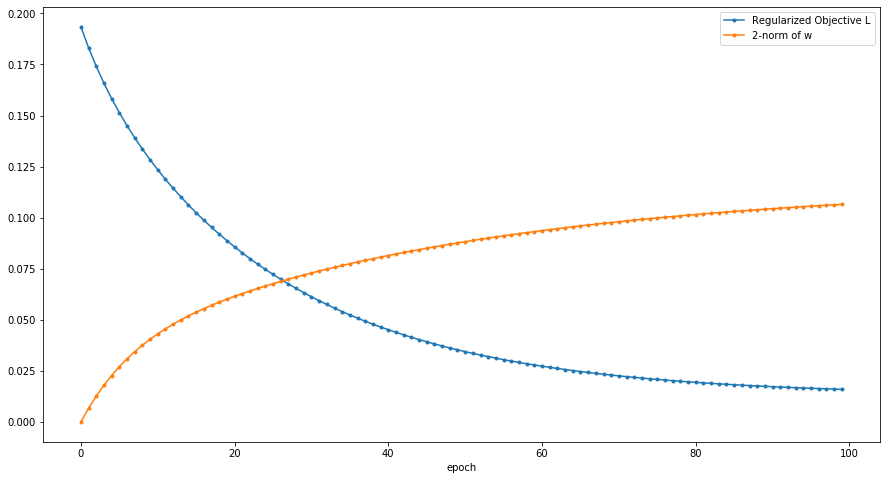

In [224]:
plt.figure(figsize = (15,8))
plt.plot(range(100),l_log, marker = 'o', ms = 3, label = 'Regularized Objective L')
plt.plot(range(100),w_log, marker = 'o', ms = 3, label = '2-norm of w')
plt.xlabel('epoch')
plt.legend();

## 4.4

In [205]:
para_list = [0.001,0.01,0.1,1,10]
w = []
b = []
for para in para_list:
    w_new,b_new,aa,aaa = gd_ridge(data = df2, n_epoch=100, lr=0.01, lamda=para, log = False)
    w.append(w_new)
    b.append(b_new)

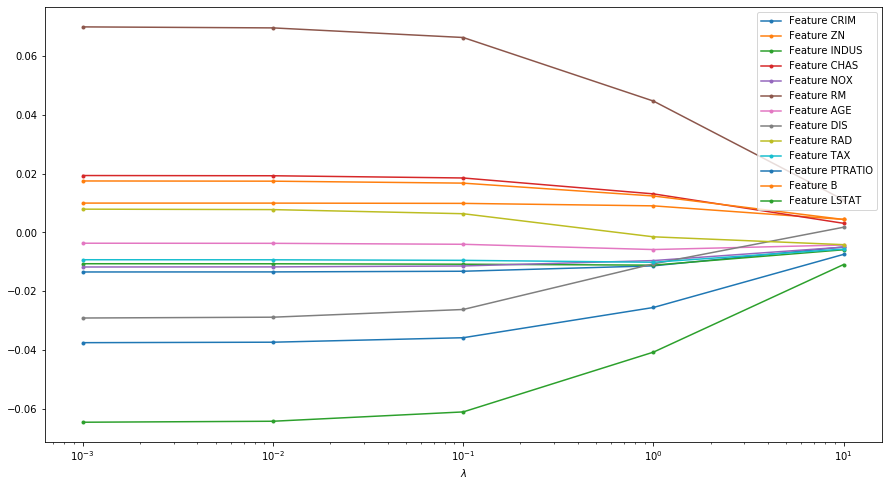

In [228]:
plt.figure(figsize = (15,8))
for fea in range(df2.shape[1]-1):
    plt.plot(para_list,np.transpose(w)[fea],marker = 'o', ms = 3, label = 'Feature {}'.format(df2.columns[fea]))

plt.xlabel('$\lambda$')
plt.xscale('log')
plt.legend();

In [217]:
np.transpose(w)

array([[-0.01345659, -0.01343337, -0.01320684, -0.01137107, -0.00494374],
       [ 0.00998579,  0.00997697,  0.00988916,  0.00904581,  0.00442385],
       [-0.01065126, -0.0106676 , -0.01081327, -0.01113883, -0.00589555],
       [ 0.01936649,  0.01928797,  0.0185317 ,  0.01312281,  0.00310169],
       [-0.01176233, -0.0117287 , -0.01141379, -0.00957649, -0.00499733],
       [ 0.06994972,  0.06960696,  0.06633801,  0.04470477,  0.01105229],
       [-0.00367239, -0.00370723, -0.00403402, -0.00582513, -0.00427592],
       [-0.02912298, -0.02884496, -0.0262247 , -0.01070044,  0.00177348],
       [ 0.00792014,  0.00777056,  0.00636815, -0.00149203, -0.00416389],
       [-0.00929321, -0.00931329, -0.00949625, -0.01015145, -0.00565803],
       [-0.03751646, -0.03735683, -0.03583142, -0.02554084, -0.0074604 ],
       [ 0.0175144 ,  0.01744435,  0.01677758,  0.01240385,  0.00440705],
       [-0.06459143, -0.06425701, -0.06108038, -0.04073663, -0.01091797]])

In [135]:
df2

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.422222  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  0.368889  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  0.660000  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  0.631111  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  0.693333  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147  0.386667  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850  0.346667  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.420000  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302  0.377778  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058  0.153333  

[506 rows x 14 columns]